<a href="https://colab.research.google.com/github/SebastianMoralesDuque/ColabNotebooks/blob/main/SebastianMorales_JuanAngelArdila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

Codigo para cargar el archivo .csv


In [ ]:
# Subir el archivo CSV
datos = files.upload()
archivo = list(datos.keys())[0]
# Cargar el archivo CSV en un DataFrame de Panda
df = pd.read_csv(archivo)

# *Punto 2*
Para identificar los datos faltantes se ha revisado la tabla de datos en una hoja de cálculo y se ha podido observar que los datos nulos han sido registrados con el símbolo “?”, como se puede ver en la siguiente imagen.
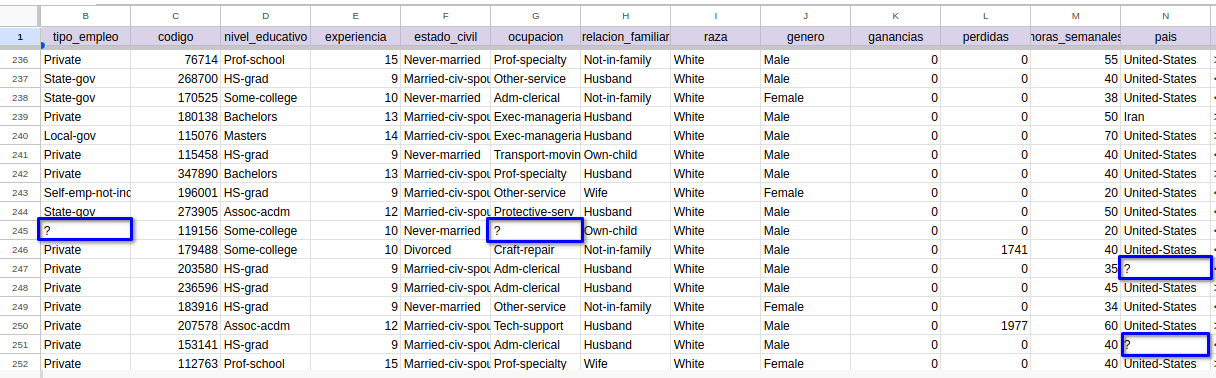

In [ ]:
# Contar los valores nulos ("?") en cada columna
nulos_por_columna = df.applymap(lambda x: 1 if x == "?" else 0).sum()
print("Valores nulos por columna\n")
print(nulos_por_columna)

# Calcular el porcentaje de valores nulos en cada columna
porcentaje_nulos_por_columna = (nulos_por_columna / len(df)) * 100

print("\nValores convertido a porcentajes\n")
print(porcentaje_nulos_por_columna)


# Definir el umbral para considerar si una columna tiene el 30% de datos faltantes
umbral = 30

# Identificar las columnas que tienen el 30% o más de datos faltantes
columnas_con_muchos_nulos = porcentaje_nulos_por_columna[porcentaje_nulos_por_columna >= umbral].index

if len(columnas_con_muchos_nulos) > 0:
    print("Columnas con el 30% o más de datos faltantes:")
    print(columnas_con_muchos_nulos)
else:
    print("No hay columnas con el 30% de los datos faltantes")

Valores nulos por columna

edad                    0
tipo_empleo          1836
codigo                  0
nivel_educativo         0
experiencia             0
estado_civil            0
ocupacion            1843
relacion_familiar       0
raza                    0
genero                  0
ganancias               0
perdidas                0
horas_semanales         0
pais                  583
salario                 0
dtype: int64

Valores convertido a porcentajes

edad                 0.000000
tipo_empleo          5.638647
codigo               0.000000
nivel_educativo      0.000000
experiencia          0.000000
estado_civil         0.000000
ocupacion            5.660146
relacion_familiar    0.000000
raza                 0.000000
genero               0.000000
ganancias            0.000000
perdidas             0.000000
horas_semanales      0.000000
pais                 1.790486
salario              0.000000
dtype: float64
No hay columnas con el 30% de los datos faltantes


Se pudo observar que sólo tres columnas contienen datos faltantes: tipo_empleo, ocupacion y pais, dónde cada una tiene un porcentaje de datos nulos 5.6%, 5.6% y 1.8% respectivamente.

# Punto 3
**Construya un gráfico de cajas y bigotes para 2 variables numéricas, en relación con clase.  Concluya al respecto.**

**Conclusiones**

Respecto al siguiente gráfico se puede concluir:

1. **Distribución de Edades:**
   - En ambos grupos, la edad máxima registrada es 90 años, mientras que la edad mínima es 17 años. Estos valores extremos pueden considerarse atípicos.
   - La mediana (Q2) de edades en el grupo con salarios >50K es mayor (44 años) en comparación con el grupo con salarios <=50K (34 años). Esto sugiere que las personas con salarios más altos tienden a ser más mayores en promedio.

2. **Dispersión y Variabilidad:**
   - Los rangos intercuartiles (IQR) de edades son 21 años para salarios <=50K y 15 años para salarios >50K. Esto indica que las edades en el grupo <=50K tienden a ser más dispersas en comparación con el grupo >50K.
   - En ambos grupos, hay valores que se consideran atípicos, ya que están más allá de los límites superiores e inferiores (upper fence y lower fence).

3. **Limpieza de Datos:**
   - Dado que aún no se ha realizado la limpieza de datos, es importante revisar y abordar los valores atípicos. Estos valores extremos podrían afectar la precisión del análisis y modelos. Se debe considerar que si estos valores atípicos son errores de entrada, casos excepcionales o si deben ser tratados de alguna manera antes de sacar conclusiones finales.

4. **Tendencias Generales:**
   - Las edades en ambos grupos varían significativamente, lo que puede ser un factor importante en el análisis de la relación entre edad y salario. Es posible que desees explorar más a fondo cómo otras variables podrían estar relacionadas con esta distribución de edades y cómo se refleja en los salarios.

En resumen, las conclusiones actuales sugieren que las edades varían entre las dos categorías de salario, con una tendencia a mayores edades en el grupo con salarios más altos. La limpieza de datos es esencial para obtener resultados más precisos y confiables, y podría influir en las conclusiones finales.

In [ ]:
px.box(df,x = 'salario',y='edad', color='salario',
       title='Boxplots edad con relación al salario')

# Conclusiones

Respecto al siguiente grafico se puede concluir:

1. **Distribución de Experiencia:**
- En la categoría de salario "<=50k", la experiencia máxima registrada es de 16 años, mientras que en la categoría de salario ">50k" también se alcanza una experiencia máxima de 16 años. Esto sugiere que ambas categorías contienen individuos con experiencias similares.
- En ambas categorías de salario, se observan valores bajos de experiencia en el primer cuartil, con un valor de 1 año en ambos casos.

2. **Dispersion y Variabilidad:**
- El rango de experiencia es amplio en ambas categorías de salario, abarcando desde 1 año hasta 16 años.
- La variabilidad en la experiencia es más pronunciada en la categoría ">50k", ya que el tercer cuartil (Q3) y el valor máximo son mayores en comparación con la categoría "<=50k".

3. **Tendencias Generales:**
- En ambas categorías de salario, la mediana de experiencia es mayor que el primer cuartil (Q1), lo que indica que la mayoría de las personas tienen experiencia superior al valor del primer cuartil.
- La mediana de experiencia en la categoría ">50k" es mayor que en la categoría "<=50k", lo que sugiere que los individuos con salarios más altos tienden a tener más experiencia en general.


En resumen los boxplots muestran que, a pesar de algunas similitudes en la distribución de experiencia entre las categorías de salario, hay diferencias notables en cuanto a la dispersión y tendencias. El hecho de que en la categoría de salario ">50k" se observen valores superiores en los cuartiles superiores y la mediana indica una mayor concentración de personas con mayor experiencia. Sin embargo, es importante tener en cuenta que estos resultados se basan en los datos originales y aún no se han realizado las etapas de limpieza y preparación de los datos.

In [ ]:
px.box(df,x = 'salario',y='experiencia', color='salario',
       title='Boxplots experiencia con relación al salario')

# Punto 4

**Solucione los problemas referentes a calidad de datos presentes en al menos 6 variables, al menos dos de ellas deben ser categóricas. Elimine columnas irrelevantes. Identifique los datos atípicos reemplace esos valores por la media de cada clase o la moda, según corresponda. Debe agregar un párrafo, describiendo de manera ejecutiva, cuál fue el proceso seguido.**

Se copia un dataframe a partir del original para no modificar el principal.

In [ ]:
# Crear un DataFrame "df_limpio" a partir del original "df"
df_limpio = df.copy()

#Variables numéricas

---

*   **edad:** En esta etapa, hemos trabajado en mejorar la calidad de la variable "edad" en nuestro conjunto de datos. Hemos calculado las edades promedio para dos grupos según el salario y luego corregido valores extremos. Esto nos garantiza una representación precisa y coherente de las edades, lo que es esencial para análisis futuros.

In [ ]:
# Calcular la media de la edad para cada grupo de salario
media_edad_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'edad'].mean()
media_edad_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'edad'].mean()

# Identificar y reemplazar valores atípicos en 'edad' según el grupo de salario
rango_edad_valido_menor_igual_50k = (0, 75)  # Definir el rango de edad válido para "<=50k"
rango_edad_valido_mayor_50k = (0, 73)  # Definir el rango de edad válido para ">50k"

df_limpio['edad'] = np.where((df_limpio['salario'] == '<=50K') & ((df_limpio['edad'] < rango_edad_valido_menor_igual_50k[0]) | (df_limpio['edad'] > rango_edad_valido_menor_igual_50k[1])),
                             media_edad_menor_igual_50k,
                             df_limpio['edad'])

df_limpio['edad'] = np.where((df_limpio['salario'] == '>50K') & ((df_limpio['edad'] < rango_edad_valido_mayor_50k[0]) | (df_limpio['edad'] > rango_edad_valido_mayor_50k[1])),
                             media_edad_mayor_50k,
                             df_limpio['edad'])


#Variables categóricas

---


*   **tipo_empleo:** En esta etapa, hemos trabajado en mejorar la integridad de la variable "tipo_empleo" en nuestro conjunto de datos. Para lograrlo, hemos reemplazado los valores faltantes (representados por "?") en función de los distintos niveles de salario: "<=50K" y ">50K". Esto asegura que nuestros datos estén más completos y preparados para análisis posteriores.

In [ ]:
# Calcular las modas de 'tipo_empleo' para cada grupo de salario
moda_tipo_empleo_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'tipo_empleo'].mode()[0]
moda_tipo_empleo_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'tipo_empleo'].mode()[0]

# Reemplazar los valores "?" en 'tipo_empleo' según el grupo de salario
df_limpio['tipo_empleo'] = np.where((df_limpio['salario'] == '<=50K') & (df_limpio['tipo_empleo'] == "?"),
                                   moda_tipo_empleo_menor_igual_50k,
                                   df_limpio['tipo_empleo'])

df_limpio['tipo_empleo'] = np.where((df_limpio['salario'] == '>50K') & (df_limpio['tipo_empleo'] == "?"),
                                   moda_tipo_empleo_mayor_50k,
                                   df_limpio['tipo_empleo'])

# Contar los valores nulos ("?") en la columna 'tipo_empleo'
nulos_tipo_empleo = df_limpio['tipo_empleo'].apply(lambda x: 1 if x == "?" else 0).sum()

print("Cantidad de valores nulos en la columna 'tipo_empleo' después del reemplazo:", nulos_tipo_empleo)


Cantidad de valores nulos en la columna 'tipo_empleo' después del reemplazo: 0


*   **ocupacion:** Hemos trabajado en mejorar la información sobre ocupación en nuestros datos. Para hacerlo, reemplazamos los espacios en blanco (representados por "?") según los diferentes niveles de ingresos: "<=50K" y ">50K". Esto asegura que los datos estén más completos y listos para su análisis. En resumen, ajustamos la información de ocupación para que esté en buen estado y sea útil en nuestras futuras investigaciones.

In [ ]:
# Calcular las modas de 'ocupacion' para cada grupo de salario
moda_ocupacion_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'ocupacion'].mode()[0]
moda_ocupacion_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'ocupacion'].mode()[0]

# Reemplazar los valores "?" en 'ocupacion' según el grupo de salario
df_limpio['ocupacion'] = np.where((df_limpio['salario'] == '<=50K') & (df_limpio['ocupacion'] == "?"),
                                  moda_ocupacion_menor_igual_50k,
                                  df_limpio['ocupacion'])

df_limpio['ocupacion'] = np.where((df_limpio['salario'] == '>50K') & (df_limpio['ocupacion'] == "?"),
                                  moda_ocupacion_mayor_50k,
                                  df_limpio['ocupacion'])

# Contar los valores nulos ("?") en la columna 'ocupacion'
nulos_ocupacion = df_limpio['ocupacion'].apply(lambda x: 1 if x == "?" else 0).sum()

print("Cantidad de valores nulos en la columna 'ocupacion' después del reemplazo:", nulos_ocupacion)


Cantidad de valores nulos en la columna 'ocupacion' después del reemplazo: 0


*   **pais:** Aqui hemos trabajado en mejorar la información sobre el país en nuestros datos. Para hacerlo, hemos reemplazado los espacios en blanco (representados por "?") según los diferentes niveles de ingresos: "<=50K" y ">50K". Esto hace que nuestros datos estén más completos y listos para analizar.

In [ ]:
# Calcular las modas de 'pais' para cada grupo de salario
moda_pais_menor_igual_50k = df_limpio.loc[df_limpio['salario'] == '<=50K', 'pais'].mode()[0]
moda_pais_mayor_50k = df_limpio.loc[df_limpio['salario'] == '>50K', 'pais'].mode()[0]

# Reemplazar los valores "?" en 'pais' según el grupo de salario
df_limpio['pais'] = np.where((df_limpio['salario'] == '<=50K') & (df_limpio['pais'] == "?"),
                             moda_pais_menor_igual_50k,
                             df_limpio['pais'])

df_limpio['pais'] = np.where((df_limpio['salario'] == '>50K') & (df_limpio['pais'] == "?"),
                             moda_pais_mayor_50k,
                             df_limpio['pais'])

# Contar los valores nulos ("?") en la columna 'pais'
nulos_pais = df_limpio['pais'].apply(lambda x: 1 if x == "?" else 0).sum()

print("Cantidad de valores nulos en la columna 'pais' después del reemplazo:", nulos_pais)


Cantidad de valores nulos en la columna 'pais' después del reemplazo: 0


Basándonos en los datos proporcionados, la columna "código" parece ser irrelevante para el análisis. Observando los valores en la columna, parece que no tiene una relación clara con las demás variables y no aporta información útil para comprender las características de los individuos. Los valores en esta columna no siguen ningún patrón discernible y no parecen tener influencia en el salario o en otras variables relevantes. Por lo tanto, decidir eliminar esta columna contribuye a simplificar el conjunto de datos y a centrarse en las características que realmente importan para nuestro análisis.

In [70]:
# Verificar si hay números repetidos en la columna "codigo"
repetidos_codigo = df_limpio['codigo'].duplicated()

if repetidos_codigo.any():
    print("Hay números repetidos en la columna 'codigo'")
else:
    print("No hay números repetidos en la columna 'codigo'")

# Eliminar la columna 'código' del DataFrame
df_limpio = df_limpio.drop('codigo', axis=1)

# Imprimir todas las columnas restantes
print("Columnas restantes:")
print(df_limpio.columns)


KeyError: ignored